In [ ]:
import tweepy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import missingno as msno


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
consumer_key='QhkLoILcgbhRAVFE8ufrx9DaJ'
consumer_secret='DsvOIr4SlMQyytnofHo6K8UHPkzBIuAwGaAurLW7KS2wYv48MA'
access_token_key='1375889877661704194-HL9c3trIO0VUpB43N57Umf7boH7O7f'
access_token_secret='3pnzYlk3zIHlyfkuPnxtTTOCPuIDpIMPqyeSedKMFXZZG'


In [ ]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

authenticate.set_access_token(access_token_key, access_token_secret)

api = tweepy.API(authenticate)


In [ ]:
## Twitter data extraction
tweet_data_benefits = api.search('pfizer benefits', count=10000 , lang= "en" , twitter_mode= "extended")
tweet_data_side_effect = api.search('pfizer side effect', count=10000 , lang= "en" , twitter_mode= "extended")
tweet_data_vaccine = api.search('pfizer Vaccine problem', count=10000 , lang= "en" , twitter_mode= "extended")
tweet_data_reaction = api.search('pfizer Vaccine reaction', count=10000 , lang= "en" , twitter_mode= "extended")


In [ ]:
df_1 = pd.DataFrame([tweet.text for tweet  in tweet_data_vaccine], columns=['Tweets'] )
df_2 = pd.DataFrame([tweet.text for tweet  in tweet_data_reaction], columns=['Tweets'] )
df_3 = pd.DataFrame([tweet.text for tweet  in tweet_data_side_effect], columns=['Tweets'] )
df_4 = pd.DataFrame([tweet.text for tweet  in tweet_data_benefits], columns=['Tweets'] )


In [ ]:
# Chnage the df_1 to df_4 to visualize the data of other dataframes
df_1.head(10)

,Tweets
0,so the EMA nailed it now: serious Covid at inc...
1,@mmpadellan My wife and I did the Pfizer vacci...
2,"@fr0ggggggg @bennessb Fibromyalgia/Pfizer, jus..."
3,"RT @AAPSonline: ""PFIZER SPENT BIG ON BIDEN’s I..."
4,@PhysicsIsMyGame @TorontoStar There is not a v...
5,"@aetiology In fact, I am storing about 2,000 P..."
6,"RT @AAPSonline: ""PFIZER SPENT BIG ON BIDEN’s I..."
7,@wee_rogue @Stat_Sloth @analytic_fpl The probl...
8,"RT @AAPSonline: ""PFIZER SPENT BIG ON BIDEN’s I..."
9,"RT @AAPSonline: ""PFIZER SPENT BIG ON BIDEN’s I..."


In [ ]:
print(tweet_data_vaccine[0].id)
print(tweet_data_vaccine[0].created_at)
print(tweet_data_vaccine[0].source)



1385706123987202050
2021-04-23 21:24:19
Twitter Web App


In [ ]:
print(dir(tweet_data_vaccine[0]))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [ ]:
# Feature column creation step

df_1['len']  = np.array([len(tweet.text) for tweet in tweet_data_benefits])
df_1['ID']   = np.array([tweet.id for tweet in tweet_data_benefits])
df_1['Date'] = np.array([tweet.created_at for tweet in tweet_data_benefits])
df_1['Source'] = np.array([tweet.source for tweet in tweet_data_benefits])
df_1['Likes']  = np.array([tweet.favorite_count for tweet in tweet_data_benefits])
df_1['RTs']    = np.array([tweet.retweet_count for tweet in tweet_data_benefits])

df_2['len']  = np.array([len(tweet.text) for tweet in tweet_data_reaction])
df_2['ID']   = np.array([tweet.id for tweet in tweet_data_reaction])
df_2['Date'] = np.array([tweet.created_at for tweet in tweet_data_reaction])
df_2['Source'] = np.array([tweet.source for tweet in tweet_data_reaction])
df_2['Likes']  = np.array([tweet.favorite_count for tweet in tweet_data_reaction])
df_2['RTs']    = np.array([tweet.retweet_count for tweet in tweet_data_reaction])

df_3['len']  = np.array([len(tweet.text) for tweet in tweet_data_vaccine])
df_3['ID']   = np.array([tweet.id for tweet in tweet_data_vaccine])
df_3['Date'] = np.array([tweet.created_at for tweet in tweet_data_vaccine])
df_3['Source'] = np.array([tweet.source for tweet in tweet_data_vaccine])
df_3['Likes']  = np.array([tweet.favorite_count for tweet in tweet_data_vaccine])
df_3['RTs']    = np.array([tweet.retweet_count for tweet in tweet_data_vaccine])

df_4['len']  = np.array([len(tweet.text) for tweet in tweet_data_side_effect])
df_4['ID']   = np.array([tweet.id for tweet in tweet_data_side_effect])
df_4['Date'] = np.array([tweet.created_at for tweet in tweet_data_side_effect])
df_4['Source'] = np.array([tweet.source for tweet in tweet_data_side_effect])
df_4['Likes']  = np.array([tweet.favorite_count for tweet in tweet_data_side_effect])
df_4['RTs']    = np.array([tweet.retweet_count for tweet in tweet_data_side_effect])


In [ ]:
# change the df_1 to df_4 to see the other twitter dataframe

display(df_3.head(10000))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@StephenBright Had my 1st two weeks ago. Pfiz...,142,1385706123987202050,2021-04-23 21:24:19,Twitter Web App,0,0
1,got my second dose of pfizer and all of the su...,140,1385699369542995970,2021-04-23 20:57:29,Twitter for Android,0,0
2,RT @The__Raven___: My daughter and I got our f...,140,1385675088528297989,2021-04-23 19:21:00,Twitter for iPhone,2,0
3,yeah I've got pfizer side effect symptoms\n\ns...,139,1385657196718002179,2021-04-23 18:09:54,Twitter Web App,0,30
4,"@DramaFollower @NewWestSandy Like I said, it’s...",138,1385652151654010881,2021-04-23 17:49:51,Twitter Web App,0,0
...,...,...,...,...,...,...,...
95,It is now 18 hours after my 2nd shot of the Pf...,140,1385120631771983872,2021-04-22 06:37:47,Twitter Web App,15,7
96,RT @nina_walat: I just got my first dose of Pf...,140,1385117778500227078,2021-04-22 06:26:27,Twitter for Android,0,0
97,@melissawho__ I know it’s different for everyo...,139,1385117176689045511,2021-04-22 06:24:03,Twitter for Mac,0,30
98,@PRisUs @Starbucks Good luck! Dose 2 of Pfizer...,139,1385115000801402881,2021-04-22 06:15:25,Twitter for iPhone,0,109


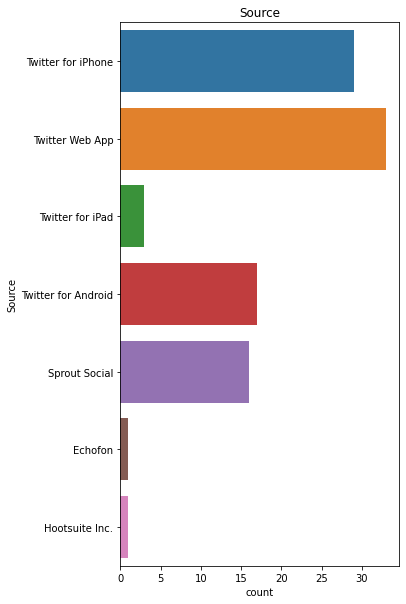

In [ ]:
# data source visualization for the data with query "pfizer bebefits"
plt.figure(figsize=(5,10))
sns.countplot(x=None ,y='Source', data = df_1 )
plt.title('Source')
plt.show()

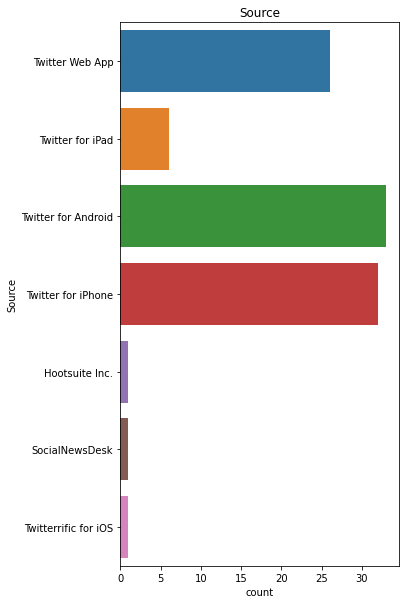

In [ ]:
# data source visualization for the data with query "pfizer reaction"

plt.figure(figsize=(5,10))
sns.countplot(x=None ,y='Source', data = df_2 )
plt.title('Source')
plt.show()

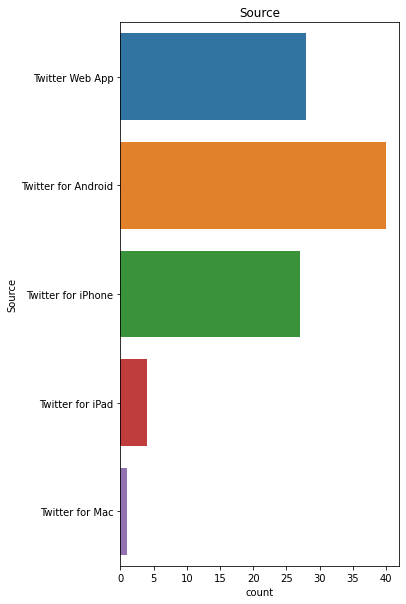

In [ ]:
# data source visualization for the data with query "pfizer vaccine probelms"
plt.figure(figsize=(5,10))
sns.countplot(x=None ,y='Source', data = df_3 )
plt.title('Source')
plt.show()

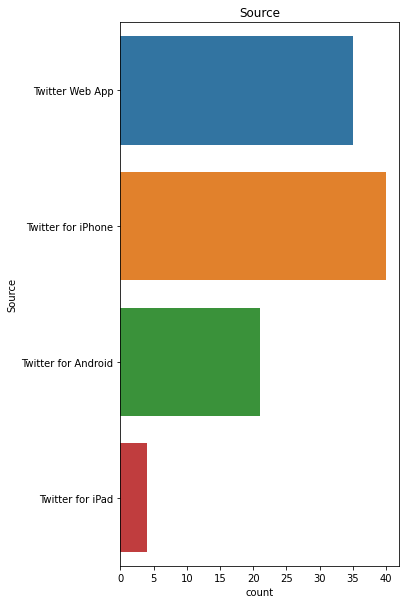

In [ ]:
# data source visualization for the data with query "pfizer side effect"
plt.figure(figsize=(5,10))
sns.countplot(x=None ,y='Source', data = df_4 )
plt.title('Source')
plt.show()

In [ ]:
# joining of all the dataframe

df=pd.concat([df_1, df_2, df_3, df_4])
print(len(df))
df.head()

400


,Tweets,len,ID,Date,Source,Likes,RTs
0,so the EMA nailed it now: serious Covid at inc...,139,1385700649288048641,2021-04-23 21:02:34,Twitter for iPhone,0,39
1,@mmpadellan My wife and I did the Pfizer vacci...,140,1385697271489208321,2021-04-23 20:49:09,Twitter Web App,0,2
2,"@fr0ggggggg @bennessb Fibromyalgia/Pfizer, jus...",139,1385695877352861697,2021-04-23 20:43:36,Twitter for iPad,0,39
3,"RT @AAPSonline: ""PFIZER SPENT BIG ON BIDEN’s I...",139,1385686422523465737,2021-04-23 20:06:02,Twitter for Android,0,48
4,@PhysicsIsMyGame @TorontoStar There is not a v...,139,1385686068968689668,2021-04-23 20:04:38,Twitter for iPhone,12,2


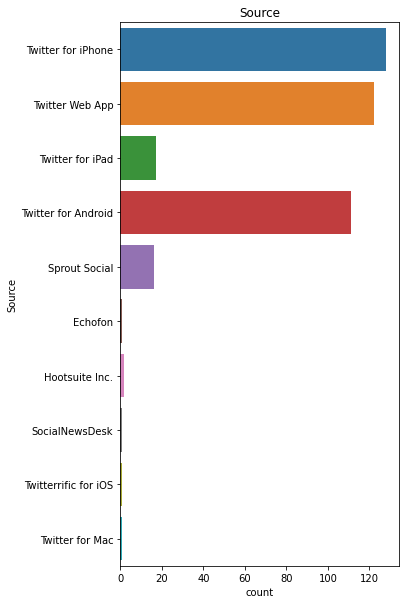

In [ ]:
# source distribution of the whole data

plt.figure(figsize=(5,10))
sns.countplot(x=None ,y='Source', data = df)
plt.title('Source')
plt.show()

In [ ]:
def getPolarity(text): 
    return TextBlob(text).sentiment.polarity
df["Polarity"] = df["Tweets"].apply(getPolarity)

Data Cleaning


In [ ]:
# Data cleaning step

new_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

In [ ]:
def cleanText(text):
    text = text.lower() # Makes text lowercase
    text = re.sub('https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub('#', '', text) # Removes hashtags
    text = re.sub('@[A-Za-z0–9]+', '', text) # Removes mentions (@)
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets,len,ID,Date,Source,Likes,RTs,Polarity
0,so the ema nailed it now: serious covid at inc...,139,1385700649288048641,2021-04-23 21:02:34,Twitter for iPhone,0,39,-0.25
1,my wife and i did the pfizer vaccine in febru...,140,1385697271489208321,2021-04-23 20:49:09,Twitter Web App,0,2,0.25
2,"fibromyalgia/pfizer, just a sore arm and rea...",139,1385695877352861697,2021-04-23 20:43:36,Twitter for iPad,0,39,-0.40
3,"rt : ""pfizer spent big on biden’s inauguration...",139,1385686422523465737,2021-04-23 20:06:02,Twitter for Android,0,48,-0.05
4,there is not a vaccine supply problem. plent...,139,1385686068968689668,2021-04-23 20:04:38,Twitter for iPhone,12,2,0.00
...,...,...,...,...,...,...,...,...
95,"primary school by bigpharma pfizer ,educating ...",140,1385624703012950020,2021-04-23 16:00:47,Twitter for Android,39,1,0.40
96,"23 esatto. ""there was no evidence that these b...",139,1385624666744754176,2021-04-23 16:00:38,Twitter for iPhone,0,2,0.00
97,rt : . has started a study to gather informati...,140,1385621978791415811,2021-04-23 15:49:58,Twitter for iPhone,1,0,0.16
98,rt : as we look to increase minority represent...,140,1385620787789369346,2021-04-23 15:45:14,Twitter Web App,3,0,0.00


In [ ]:
# data stats

df.describe()

,len,ID,Likes,RTs,Polarity
count,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,136.022500,1.385520e+18,2.020000,31.797500,0.048720
std,14.185735,1.797501e+14,13.836119,121.500153,0.199181
min,45.000000,1.385115e+18,0.000000,0.000000,-1.000000
25%,139.000000,1.385377e+18,0.000000,0.000000,0.000000
50%,140.000000,1.385592e+18,0.000000,2.000000,0.000000
75%,140.000000,1.385663e+18,1.000000,27.750000,0.136364
max,148.000000,1.385707e+18,251.000000,2021.000000,0.600000


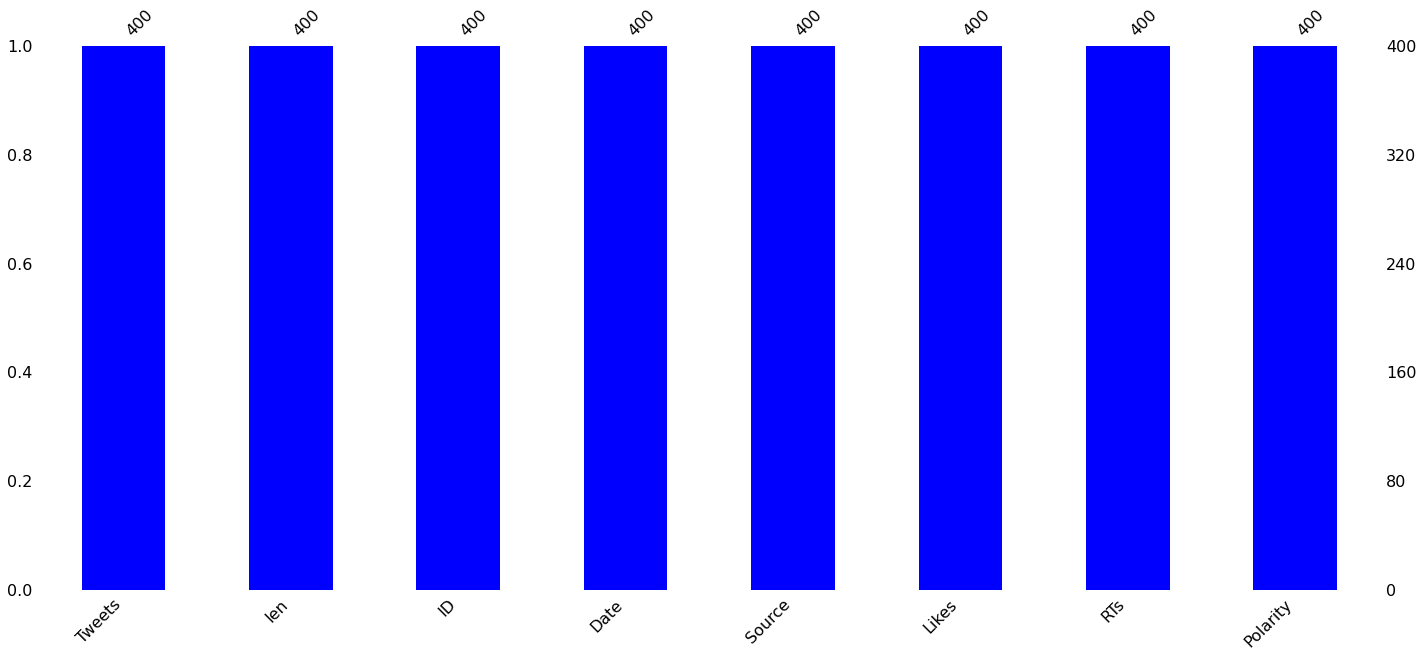

In [ ]:
# to se null values

#msno.bar(df, color='blue')

In [ ]:
#data inforation about features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tweets    400 non-null    object        
 1   len       400 non-null    int64         
 2   ID        400 non-null    int64         
 3   Date      400 non-null    datetime64[ns]
 4   Source    400 non-null    object        
 5   Likes     400 non-null    int64         
 6   RTs       400 non-null    int64         
 7   Polarity  400 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 38.1+ KB


In [ ]:
# function to tokenize the tweet text to make feature vector

def convertToList(text):
    text = word_tokenize(text)
    return [word for word in text if word not in new_stopwords]

In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df["List of Words"] = df["Tweets"].apply(convertToList)

In [ ]:
def cleanDate(date):
    month = date[5:7]
    day = date[8:10]
    
    if month[0] == "0":
        month = month[1]
    if day[0] == "0":
        day = day[1]
    
    return month + "/" + day + "/20"
df['Date']

0    2021-04-23 21:02:34
1    2021-04-23 20:49:09
2    2021-04-23 20:43:36
3    2021-04-23 20:06:02
4    2021-04-23 20:04:38
             ...        
95   2021-04-23 16:00:47
96   2021-04-23 16:00:38
97   2021-04-23 15:49:58
98   2021-04-23 15:45:14
99   2021-04-23 15:43:12
Name: Date, Length: 400, dtype: datetime64[ns]

In [ ]:
df.head(500)

,Tweets,len,ID,Date,Source,Likes,RTs,Polarity,List of Words
0,so the ema nailed it now: serious covid at inc...,139,1385700649288048641,2021-04-23 21:02:34,Twitter for iPhone,0,39,-0.25,"[ema, nailed, serious, covid, incidence, less,..."
1,my wife and i did the pfizer vaccine in febru...,140,1385697271489208321,2021-04-23 20:49:09,Twitter Web App,0,2,0.25,"[wife, pfizer, vaccine, february, first, shot,..."
2,"fibromyalgia/pfizer, just a sore arm and rea...",139,1385695877352861697,2021-04-23 20:43:36,Twitter for iPad,0,39,-0.40,"[fibromyalgia/pfizer, sore, arm, really, tired..."
3,"rt : ""pfizer spent big on biden’s inauguration...",139,1385686422523465737,2021-04-23 20:06:02,Twitter for Android,0,48,-0.05,"[rt, ``, pfizer, spent, big, biden, ’, inaugur..."
4,there is not a vaccine supply problem. plent...,139,1385686068968689668,2021-04-23 20:04:38,Twitter for iPhone,12,2,0.00,"[vaccine, supply, problem, plenty, pfizer, sho..."
...,...,...,...,...,...,...,...,...,...
95,"primary school by bigpharma pfizer ,educating ...",140,1385624703012950020,2021-04-23 16:00:47,Twitter for Android,39,1,0.40,"[primary, school, bigpharma, pfizer, educating..."
96,"23 esatto. ""there was no evidence that these b...",139,1385624666744754176,2021-04-23 16:00:38,Twitter for iPhone,0,2,0.00,"[23, esatto, ``, evidence, benefits, varied, o..."
97,rt : . has started a study to gather informati...,140,1385621978791415811,2021-04-23 15:49:58,Twitter for iPhone,1,0,0.16,"[rt, started, study, gather, information, help..."
98,rt : as we look to increase minority represent...,140,1385620787789369346,2021-04-23 15:45:14,Twitter Web App,3,0,0.00,"[rt, look, increase, minority, representation,..."


Text(0.5, 1.0, 'Most Frequently Occuring Words pfizer related topics in th tweets - Top 30')

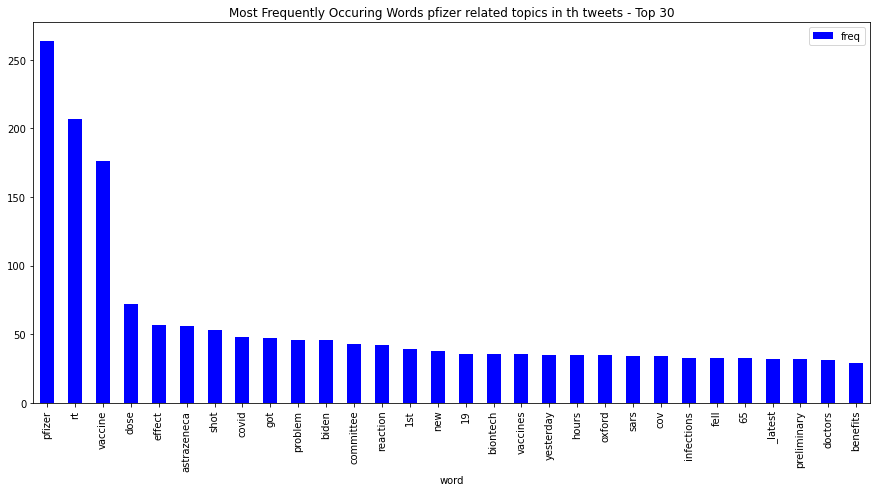

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tweets)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words pfizer related topics in th tweets - Top 30")


Text(0.5, 1.0, 'Overall word Review of the pfizer related data')

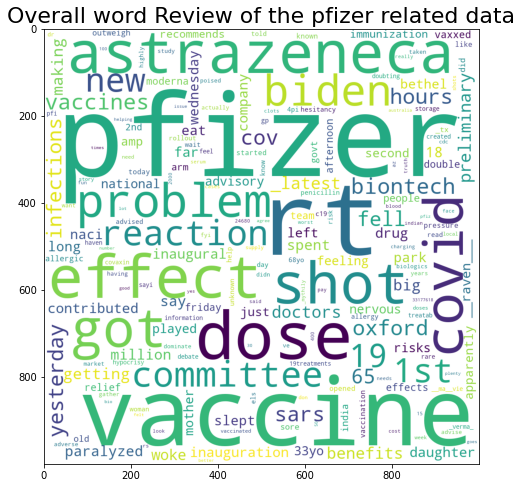

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Overall word Review of the pfizer related data", fontsize = 22)

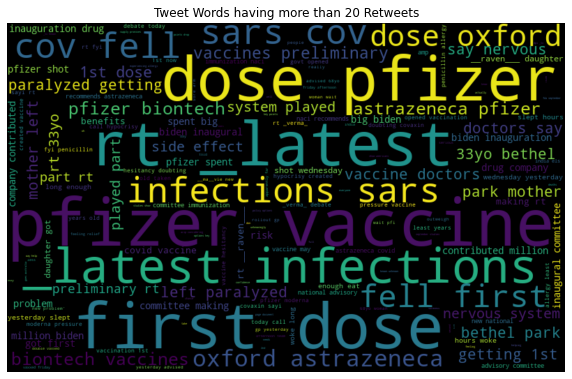

In [ ]:
normal_words =' '.join([text for text in df['Tweets'][df['RTs'] > 20]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Words having more than 20 Retweets')
plt.show()


In [ ]:
# normal_words =' '.join([text for text in df['Tweets'][df['Likes'] > 100]])

# wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.title('Tweet Words having more than 100 likes')
# plt.show()


In [ ]:
Training_Data= pd.read_csv("https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv")


In [ ]:
Training_Data['TweetText'] = Training_Data['TweetText'].apply(cleanText)
Training_Data['List of Words'] = Training_Data['TweetText'].apply(convertToList)

In [ ]:
Training_Data.head(10)

,Topic,Sentiment,TweetId,TweetDate,TweetText,List of Words
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,now all has to do is get swype on the iphone ...,"[get, swype, iphone, crack, iphone]"
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,will be adding more carrier support to the ip...,"[adding, carrier, support, iphone, 4s, announced]"
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,hilarious video - guy does a duet with 's si...,"[hilarious, video, guy, duet, 's, siri, pretty..."
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,you made it too easy for me to switch to iph...,"[made, easy, switch, iphone, see, ya]"
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,i just realized that the reason i got into twi...,"[realized, reason, got, twitter, ios5, thanks]"
5,apple,positive,126394830791254016,Tue Oct 18 20:30:50 +0000 2011,"i'm a current user, little bit disappointed w...","['m, current, user, little, bit, disappointed,..."
6,apple,positive,126379685453119488,Tue Oct 18 19:30:39 +0000 2011,the 16 strangest things siri has said so far. ...,"[16, strangest, things, siri, said, far, sooo,..."
7,apple,positive,126377656416612353,Tue Oct 18 19:22:35 +0000 2011,great up close & personal event tonight in re...,"[great, close, personal, event, tonight, regen..."
8,apple,positive,126373779483004928,Tue Oct 18 19:07:11 +0000 2011,from which companies do you experience the bes...,"[companies, experience, best, customer, servic..."
9,apple,positive,126366353757179904,Tue Oct 18 18:37:41 +0000 2011,"just apply for a job at , hope they call me lol","[apply, job, hope, call, lol]"


In [ ]:
Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Topic          5113 non-null   object
 1   Sentiment      5113 non-null   object
 2   TweetId        5113 non-null   int64 
 3   TweetDate      5113 non-null   object
 4   TweetText      5113 non-null   object
 5   List of Words  5113 non-null   object
dtypes: int64(1), object(5)
memory usage: 239.8+ KB


In [ ]:
Train_data, Test_data = train_test_split(Training_Data, test_size = 0.05)

print(Training_Data.shape)
print(Train_data.shape)
print(Test_data.shape)

(5113, 6)
(4857, 6)
(256, 6)


In [ ]:
Train_data_list = []
for index, row in Train_data.iterrows():
  Train_data_list.append((row["List of Words"], row["Sentiment"]))

Test_data_list = []
for index, row in Test_data.iterrows():
  Test_data_list.append((row["List of Words"], row["Sentiment"]))  

print(Train_data_list)

  

[(['android', '4.0', 'ice', 'cream', 'sandwich', 'make', 'smartphone', 'operating', 'systems', 'look', 'outdated', 'androidbeam', 'wowww..', 'google'], 'positive'), (['demasiado', 'twitter', 'por', 'hoy', 'nos', 'vemos', 'twitteroff'], 'irrelevant'), (['twitter'], 'neutral'), (['need', 'dates', 'google', 'samsung', 'launchfail'], 'negative'), (['imeに秋田弁辞書なんてあったらおもしろいのに', 'akita', 'ime', 'microsoft'], 'irrelevant'), (['rt', 'literally', 'go', 'back', 'forth', 'facebook', 'twitter', 'text', 'email', 'technology', 'good'], 'positive'), (['rt', 'ok', 'put', 'bible', 'verses', 'encouraging', 'post', 'god', 'twitter', 'make', 'sure', 'stand', 'words', 'cause', '...'], 'neutral'), (['find', 'best', 'maytag', 'washer', 'control', 'board', 'deal.check', 'pric'], 'irrelevant'), (['alright', "'m", 'going', 'sleep', 'goodnight', 'twitter'], 'neutral'), (['rt', 'brekend', 'microsoft', 'en', 'linux', 'nu', 'beiden', 'de', 'aanbieding'], 'irrelevant'), (['rt', 'samsung', 'google', 'unveil', 'latest',

Building a Vocabulary 

In [ ]:
def build(input_data):

    word_list = []
    
    for(words, sentiment) in input_data:
        word_list.extend(words)

    words = nltk.FreqDist(word_list)
    word_features = words.keys()

    return word_features 

In [ ]:
def get_features(text):
    tweet_words = set(text)
    features = {}
    
    for word in word_features:
        features['contains(%s)' % word] = (word in tweet_words)
        
    return features

Building our feature vector

In [ ]:
word_features = build(Train_data_list)
training_features = nltk.classify.apply_features(get_features, Train_data_list)
print(training_features[0])

({'contains(android)': True, 'contains(4.0)': True, 'contains(ice)': True, 'contains(cream)': True, 'contains(sandwich)': True, 'contains(make)': True, 'contains(smartphone)': True, 'contains(operating)': True, 'contains(systems)': True, 'contains(look)': True, 'contains(outdated)': True, 'contains(androidbeam)': True, 'contains(wowww..)': True, 'contains(google)': True, 'contains(demasiado)': False, 'contains(twitter)': False, 'contains(por)': False, 'contains(hoy)': False, 'contains(nos)': False, 'contains(vemos)': False, 'contains(twitteroff)': False, 'contains(need)': False, 'contains(dates)': False, 'contains(samsung)': False, 'contains(launchfail)': False, 'contains(imeに秋田弁辞書なんてあったらおもしろいのに)': False, 'contains(akita)': False, 'contains(ime)': False, 'contains(microsoft)': False, 'contains(rt)': False, 'contains(literally)': False, 'contains(go)': False, 'contains(back)': False, 'contains(forth)': False, 'contains(facebook)': False, 'contains(text)': False, 'contains(email)': False

In [ ]:
testing_features = nltk.classify.apply_features(get_features, Test_data_list)

Training the classifier 

In [ ]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_features)

In [ ]:
classifier_result_labels = [naive_bayes_classifier.classify(get_features(tweet[0])) for tweet in Test_data_list]

In [ ]:

print("Percentage of Positive Sentiments:", classifier_result_labels.count('positive') / Test_data.shape[0])
print("Percentage of neutral Sentiments:", classifier_result_labels.count('neutral') / Test_data.shape[0])
print("Percentage of Negative Sentiments:", classifier_result_labels.count('negative') / Test_data.shape[0])

Percentage of Positive Sentiments: 0.00390625
Percentage of neutral Sentiments: 0.7890625
Percentage of Negative Sentiments: 0.0078125


In [ ]:
print ('accuracy:', nltk.classify.util.accuracy(naive_bayes_classifier, testing_features))

accuracy: 0.6875


[link text](https://)Applying the Model to Pfizer Vaccine Data


In [ ]:
#Train_data, Test_data = train_test_split(df, test_size = 0.2)

In [ ]:
print(df.shape)
print(Train_data.shape)
print(Test_data.shape)

(400, 9)
(4857, 6)
(256, 6)


In [ ]:
#word_features = build(Train_data_list)
#training_features = nltk.classify.apply_features(get_features, Train_data_list)

In [ ]:
#naive_bayes_classifier = nltk.NaiveBayesClassifier.train(training_features)

In [ ]:

PfizerVaccine_classifier_labels = [naive_bayes_classifier.classify(get_features(row[8])) for index, row in df.iterrows()]

In [ ]:
df["Classification"] = PfizerVaccine_classifier_labels
df["Ensemble"] = PfizerVaccine_classifier_labels # temporary

In [ ]:
for index, row in df.iterrows():
    if row["Polarity"] < -0.2:
        row["Ensemble"] = "negative"
    elif row["Polarity"] > 0.2 and row["Classification"] == "neutral":
        row["Ensemble"] = "positive"



In [ ]:

df.loc[df["Polarity"] < -0.2, "Ensemble"] = "negative"
df.loc[df["Polarity"] > 0.2, "Ensemble"] = "positive"

In [ ]:

print(df["Ensemble"].value_counts())

neutral     295
positive     76
negative     29
Name: Ensemble, dtype: int64


In [ ]:
print(df["Classification"].value_counts())

neutral     388
negative     11
positive      1
Name: Classification, dtype: int64


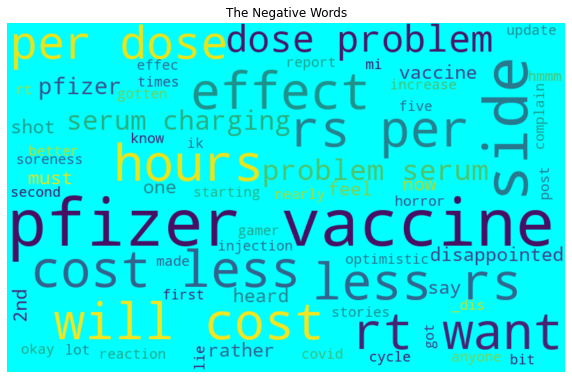

In [ ]:
# common negative words
negative =' '.join([text for text in df['Tweets'][df['Classification'] == 'negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


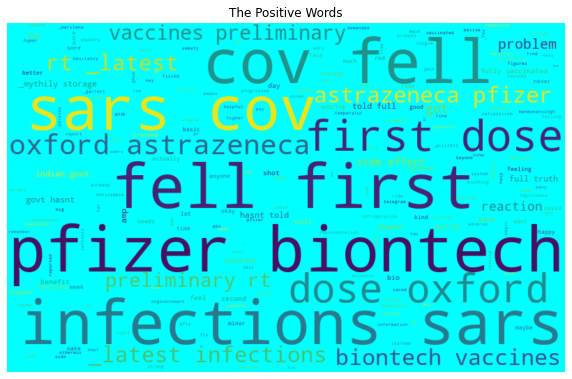

In [ ]:
# common positive words
positive =' '.join([text for text in df['Tweets'][df['Classification'] == 'positive']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(Positve)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

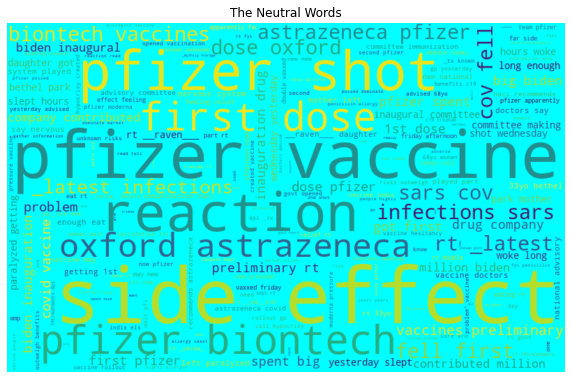

In [ ]:
# common positive words
neutral =' '.join([text for text in df['Tweets'][df['Classification'] == 'neutral']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [ ]:
Testtweet_data_list = []
for index, row in df.iterrows():
  Testtweet_data_list.append((row["List of Words"], row["Ensemble"]))  
print(len(Testtweet_data_list))
test_features = nltk.classify.apply_features(get_features, Testtweet_data_list)
print(test_features)

400
[({'contains(android)': False, 'contains(4.0)': False, 'contains(ice)': False, 'contains(cream)': False, 'contains(sandwich)': False, 'contains(make)': False, 'contains(smartphone)': False, 'contains(operating)': False, 'contains(systems)': False, 'contains(look)': False, 'contains(outdated)': False, 'contains(androidbeam)': False, 'contains(wowww..)': False, 'contains(google)': False, 'contains(demasiado)': False, 'contains(twitter)': False, 'contains(por)': False, 'contains(hoy)': False, 'contains(nos)': False, 'contains(vemos)': False, 'contains(twitteroff)': False, 'contains(need)': False, 'contains(dates)': False, 'contains(samsung)': False, 'contains(launchfail)': False, 'contains(imeに秋田弁辞書なんてあったらおもしろいのに)': False, 'contains(akita)': False, 'contains(ime)': False, 'contains(microsoft)': False, 'contains(rt)': False, 'contains(literally)': False, 'contains(go)': False, 'contains(back)': False, 'contains(forth)': False, 'contains(facebook)': False, 'contains(text)': False, 'cont

In [ ]:
# Accuracy of naive base classfier against Textblob
print ('accuracy:', nltk.classify.util.accuracy(naive_bayes_classifier, test_features))

accuracy: 0.765
